<a href="https://colab.research.google.com/github/hazalgebra/1000_Companies/blob/main/UAS_Optimization_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA	: HASRUDIN RAMLI ALGEBRA

NIM	: 310700022220029

PRODI	: SAINS DATA

MATA KULIAH	: UAS OPTIMIZATION METHOD


# BAGIAN A

Membuat Model Machine Learning Regression

# 1. Business Understanding

Tujuan Analisis: Tujuan dari analisis ini adalah untuk memprediksi profit perusahaan berdasarkan pengeluaran di departemen R&D, Administrasi, dan Pemasaran. Pertanyaan bisnis yang ingin dijawab adalah: "Apakah ada korelasi antara R&D Spend, Administration, dan Marketing Spend terhadap profit?"

# 2. Data Understanding

Membaca Dataset:

In [2]:
import pandas as pd

from google.colab import files

uploaded = files.upload()

Saving 1000_Companies.csv to 1000_Companies.csv


In [3]:
# Membaca dataset
data = pd.read_csv('1000_Companies.csv')

# Menampilkan 5 baris pertama
print(data.head())

# Menampilkan informasi dataset
print(data.info())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None


# 3. Cleaning Data
Menangani Nilai Hilang:

In [4]:
# Memeriksa nilai yang hilang
print(data.isnull().sum())

# Menghapus kolom yang tidak relevan jika ada
# data = data.drop(columns=['kolom_tidak_relevan'])

# Mengisi atau menghapus nilai yang hilang
data = data.dropna()  # Menghapus baris dengan nilai hilang

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


# 4. Exploratory Data Analysis (EDA)
Statistik Deskriptif dan Visualisasi:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count    1000.000000     1000.000000      1000.000000    1000.000000
mean    81668.927200   122963.897612    226205.058419  119546.164656
std     46537.567891    12613.927535     91578.393542   42888.633848
min         0.000000    51283.140000         0.000000   14681.400000
25%     43084.500000   116640.684850    150969.584600   85943.198543
50%     79936.000000   122421.612150    224517.887350  117641.466300
75%    124565.500000   129139.118000    308189.808525  155577.107425
max    165349.200000   321652.140000    471784.100000  476485.430000


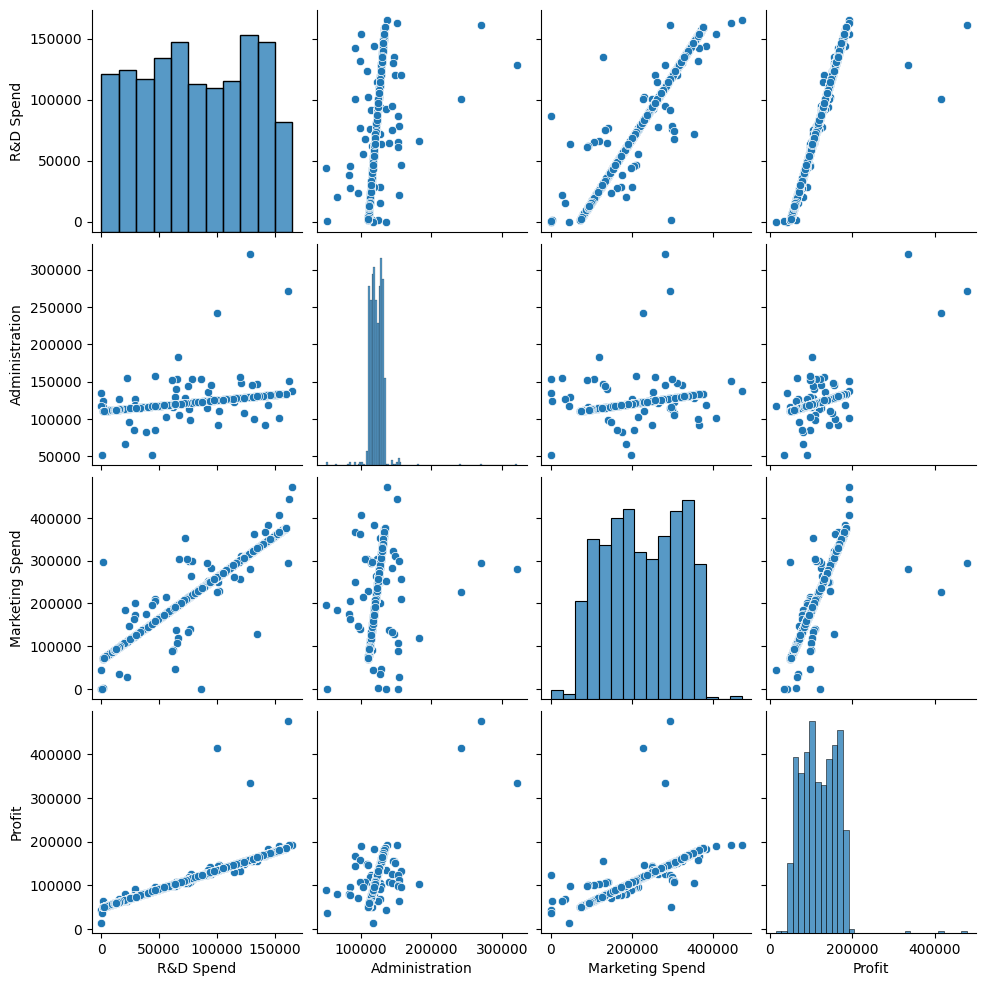

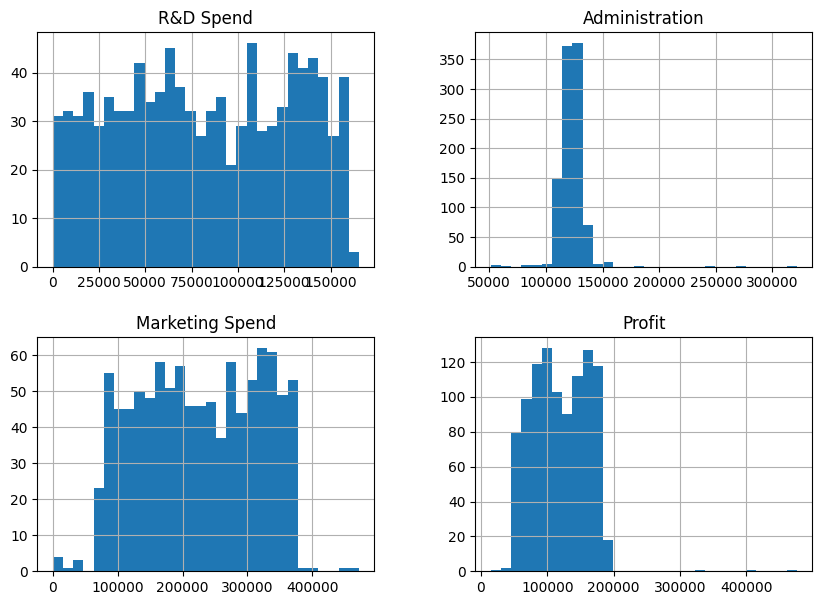

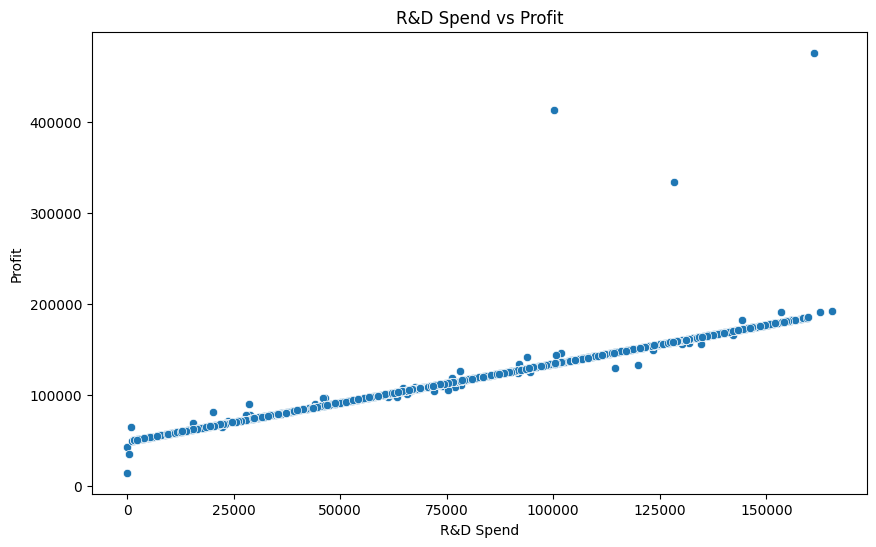

In [26]:
# Visualisasi hubungan antara variabel
sns.pairplot(data)
plt.show()

# Histogram untuk setiap kolom
data.hist(bins=30, figsize=(10, 7))
plt.show()

# Scatter plot untuk melihat hubungan antara R&D Spend dan Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title('R&D Spend vs Profit')
plt.show()

# 5. Modeling
Regresi Linear:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Memisahkan fitur dan target
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menampilkan koefisien
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Koefisien: [0.53470052 1.13904859 0.08211776]
Intercept: -82682.51868302668


# 6. Evaluasi
Evaluasi Model:

In [7]:
# Menghitung R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Menampilkan kekuatan dan kelemahan model
# Kekuatan: Model sederhana dan mudah diinterpretasikan
# Kelemahan: Mungkin tidak menangkap hubungan non-linear

R-squared: 0.9828413651608124


# 7. Communication Result
Menyajikan Hasil:

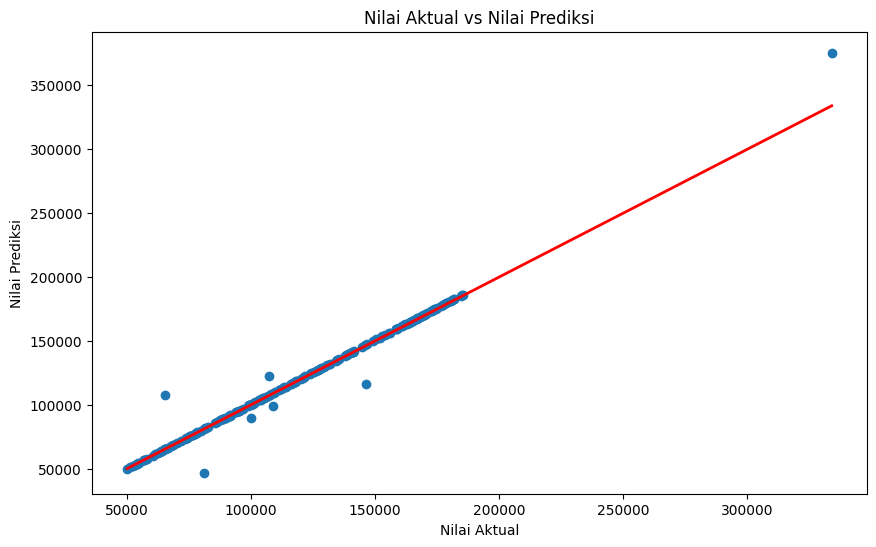

Kesimpulan:
Model regresi linear menunjukkan bahwa ada hubungan positif antara R&D Spend, Administration, dan Marketing Spend terhadap Profit.
R-squared menunjukkan seberapa baik model menjelaskan variabilitas data.


In [8]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Aktual vs Nilai Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

# Kesimpulan
print("Kesimpulan:")
print("Model regresi linear menunjukkan bahwa ada hubungan positif antara R&D Spend, Administration, dan Marketing Spend terhadap Profit.")
print("R-squared menunjukkan seberapa baik model menjelaskan variabilitas data.")

# BAGIAN B

Metode Optimisasi Gradient Descent

 TUJUAN:
*   Membangun model regresi untuk memprediksi Profit
*   Menggunakan Gradient Descent manual untuk mencari parameter terbaik
*   Membandingkan hasilnya dengan model tanpa optimisasi (OLS)
*   Menjelaskan perbedaan model dan performanya

# 1. Preprocessing Data

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [14]:
# Load data
df = pd.read_csv('1000_Companies.csv')
df = pd.get_dummies(df, drop_first=True)

In [15]:
# Pisahkan fitur dan target
X = df.drop('Profit', axis=1)
y = df['Profit'].values.reshape(-1,1)

In [16]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tambah kolom bias (intercept)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Gradient Descent Manual

In [18]:
# Inisialisasi parameter
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01  # learning rate
iterations = 1000
m = X_train.shape[0]

# Simpan history loss
loss_history = []

# Gradient Descent loop
for i in range(iterations):
    prediction = X_train @ theta
    error = prediction - y_train
    cost = (1/(2*m)) * np.sum(error ** 2)
    loss_history.append(cost)

    gradient = (1/m) * X_train.T @ error
    theta = theta - alpha * gradient


3. Evaluasi Model Gradient Descent

In [19]:
# Prediksi data uji
y_pred_gd = X_test @ theta

# MSE dan R^2
from sklearn.metrics import mean_squared_error, r2_score

mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Model Gradient Descent:\nMSE = {mse_gd:.2f}, R² = {r2_gd:.2f}")


Model Gradient Descent:
MSE = 34650302.91, R² = 0.98


# 4. Bandingkan dengan Model Sebelum Optimisasi (OLS)

In [21]:
from sklearn.linear_model import LinearRegression

model_ols = LinearRegression()
model_ols.fit(X_train, y_train)
y_pred_ols = model_ols.predict(X_test)

mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print(f"Model OLS (tanpa optimisasi manual):\nMSE = {mse_ols:.2f}, R² = {r2_ols:.2f}")


Model OLS (tanpa optimisasi manual):
MSE = 30775142.86, R² = 0.98


# 5. Analisis Perbandingan

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# --- Evaluasi OLS ---
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)
y_pred_ols = model_ols.predict(X_test)

mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

# --- Evaluasi Gradient Descent ---
y_pred_gd = X_test @ theta

mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

# --- Cetak Hasil Perbandingan ---
print("📊 PERBANDINGAN MODEL:")
print(f"OLS (tanpa optimisasi):     MSE = {mse_ols:.2f} | R² = {r2_ols:.4f}")
print(f"Gradient Descent (manual):  MSE = {mse_gd:.2f} | R² = {r2_gd:.4f}")

# --- Analisis & Kesimpulan Otomatis ---
print("\n📣 ANALISIS & KESIMPULAN:")
if mse_gd > mse_ols:
    print("- Model OLS memiliki performa yang lebih baik (MSE lebih kecil).")
else:
    print("- Model Gradient Descent memiliki performa yang lebih baik (MSE lebih kecil).")

if abs(r2_ols - r2_gd) < 0.01:
    print("- Kedua model memberikan hasil yang hampir sama. Gradient Descent cukup baik mendekati solusi OLS.")
else:
    print("- Terdapat perbedaan signifikan dalam R². Perlu evaluasi learning rate, iterasi, atau normalisasi.")

if r2_gd < r2_ols:
    print("- Gradient Descent belum optimal. Coba tambahkan iterasi atau sesuaikan learning rate.")
else:
    print("- Gradient Descent berhasil menyamai atau melampaui performa OLS.")


📊 PERBANDINGAN MODEL:
OLS (tanpa optimisasi):     MSE = 30775142.86 | R² = 0.9825
Gradient Descent (manual):  MSE = 34650302.91 | R² = 0.9803

📣 ANALISIS & KESIMPULAN:
- Model OLS memiliki performa yang lebih baik (MSE lebih kecil).
- Kedua model memberikan hasil yang hampir sama. Gradient Descent cukup baik mendekati solusi OLS.
- Gradient Descent belum optimal. Coba tambahkan iterasi atau sesuaikan learning rate.
